# ДЗ #1. Exploratory Data Analysis and Preprocessing <a id="0"></a>

### Использованный датасет: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

* [Загрузка и первичная проверка данных](#1)
* [Базовые статистики датасета, средние, медианы, и т.д.](#2)
* [Гистограммы/распределения признаков с использованием целевой переменной](#3)
* [Heatmap для матрицы корреляций. Признаки, которые сильно скоррелированы](#4)
* [Попарные scatterplot-ы для сильно скоррелированных признаков. Наблюдается ли линейная зависимость?](#5)
* [По каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных (используя boxplots и группировку по целевой переменной)](#6)

In [1]:
# Импорт основных библиотек
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка и первичная проверка данных [(Наверх)](#0) <a id="1"></a>

### Описание признаков:
- **id**
- **diagnosis** - диагноз тканей молочной железы (M = злокачественный, B = доброкачественный)
- **radius_mean** - среднее расстояние от центра до точек по периметру
- **texture_mean** - стандартное отклонение значений gray-scale
- **perimeter_mean** - средний размер ядра опухоли
- **area_mean**
- **smoothness_mean** - среднее локального изменения длин радиуса
- **compactness_mean** - среднее perimeter^2 / area - 1.0
- **concavity_mean** - среднее тяжести вогнутых частей контура
- **concavepoints_mean** - среднее количество вогнутых частей контура
- **symmetry_mean**
- **fractal_dimension_mean** - mean for "coastline approximation" - 1
- **radius_se** - standard error for the mean of distances from center to points on the perimeter
- **texture_se** - standard error for standard deviation of gray-scale values
- **perimeter_se**
- **area_se**
- **smoothness_se** - standard error for local variation in radius lengths
- **compactness_se** - standard error for perimeter^2 / area - 1.0
- **concavity_se** - standard error for severity of concave portions of the contour
- **concave points_se** - standard error for number of concave portions of the contour
- **symmetry_se**
- **fractal_dimension_se** - standard error for "coastline approximation" - 1
- **radius_worst** - "worst" or largest mean value for mean of distances from center to points on the perimeter
- **texture_worst** - "worst" or largest mean value for standard deviation of gray-scale values
- **perimeter_worst**
- **area_worst**
- **smoothness_worst** - "worst" or largest mean value for local variation in radius lengths
- **compactness_worst** - "worst" or largest mean value for perimeter^2 / area - 1.0
- **concavity_worst** - "worst" or largest mean value for severity of concave portions of the contour
- **concave_points_worst** - "worst" or largest mean value for number of concave portions of the contour
- **symmetry_worst**
- **fractal_dimension_worst** - "worst" or largest mean value for "coastline approximation" - 1

In [2]:
url = 'http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat'
filename = 'input/data.csv'
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concavepoints_mean', 
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concavepoints_se', 
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

if not os.path.exists(filename):
    df = pd.read_csv(url, names=column_names)
    df.to_csv(filename, index=False)
else:
    df = pd.read_csv(filename)

# Проверим корректно ли загружен CSV
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Базовые статистики датасета, средние, медианы, и т.д. [(Наверх)](#0) <a id="2"></a>

In [3]:
# Узнаем размер датасета
df.shape

(569, 32)

In [4]:
# Проверим на наличие пустых данных
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concavepoints_mean         0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concavepoints_se           0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Узнаем свойства датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concavepoints_mean       569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Удалим ненужное поле ID
df.drop(['id'], axis=1, inplace=True)

# Сконвертируем категорийное значение 'diagnosis' в бинарный вид
diagnosis_bool = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_bool)

# Проверим полученный результат
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Гистограммы признаков с использованием целевой переменной [(Наверх)](#0) <a id="3"></a>

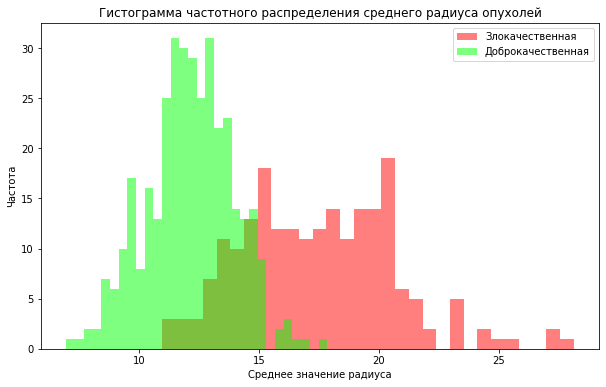

Значение высокочастотного среднего радиуса злокачественной опухоли: 20.101999999999997


In [8]:
# Построим гистограмму частотного распределения среднего радиуса опухолей
plt.figure(figsize=(10,6))
m = plt.hist(df[df["diagnosis"] == 1].radius_mean, bins=30, fc = (1,0,0,0.5), label = "Злокачественная")
b = plt.hist(df[df["diagnosis"] == 0].radius_mean, bins=30, fc = (0,1,0,0.5), label = "Доброкачественная")
plt.legend()
plt.xlabel("Среднее значение радиуса")
plt.ylabel("Частота")
plt.title("Гистограмма частотного распределения среднего радиуса опухолей")
plt.show()

# Найдем индекс максимальной частоты среднего радиуса злокачественной опухоли
freq_malignant_radius_index = list(m[0]).index(m[0].max())

# Выведем значение высокочастотного среднего радиуса злокачественной опухоли
print('Значение высокочастотного среднего радиуса злокачественной опухоли: {}'.format(m[1][freq_malignant_radius_index]))

## Heatmap для матрицы корреляций [(Наверх)](#0) <a id="4"></a>

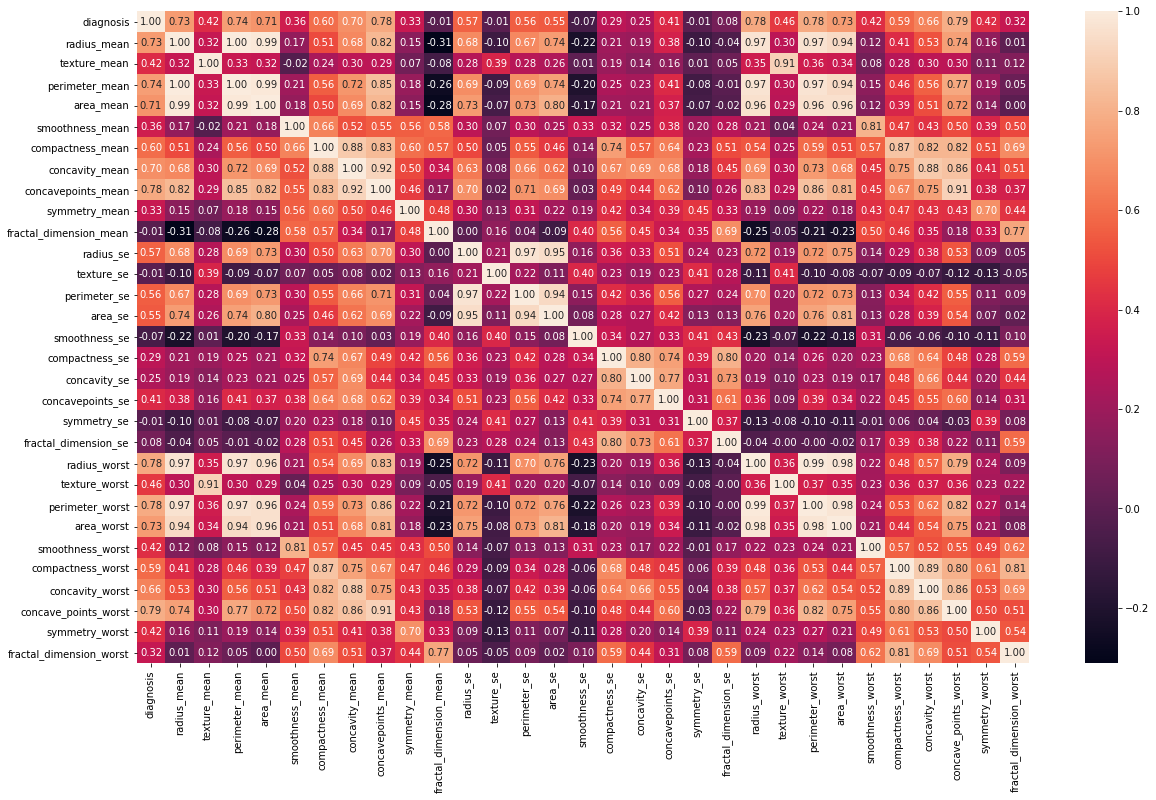

In [9]:
# Рассчитаем корреляции между признаками
corr = df.corr()

# Выведем тепловую карту для корреляций
plt.figure(figsize=(20,12));
sns.heatmap(corr, annot=True, fmt='.2f');

In [10]:
# Найдем сильноскоррелированные признаки (> 0.75)
CorField = []
for i in corr:
    for j in corr.index[corr[i] > 0.75]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print ("{0} - {1} == {2}".format(i, j, corr[i][corr.index == j].values[0]))

diagnosis - concavepoints_mean == 0.7766138400204361
diagnosis - radius_worst == 0.7764537785950388
diagnosis - perimeter_worst == 0.782914137173759
diagnosis - concave_points_worst == 0.7935660171412696
radius_mean - perimeter_mean == 0.9978552814938113
radius_mean - area_mean == 0.9873571700566119
radius_mean - area_worst == 0.9410824595860459
texture_mean - texture_worst == 0.9120445888404215
smoothness_mean - smoothness_worst == 0.805324195494363
compactness_mean - concavity_mean == 0.8831206701772499
compactness_mean - compactness_worst == 0.8658090398022638
compactness_mean - concavity_worst == 0.8162752498000282
fractal_dimension_mean - fractal_dimension_worst == 0.7672967792384349
radius_se - perimeter_se == 0.9727936770160753
radius_se - area_se == 0.95183011211099
compactness_se - concavity_se == 0.8012683427383301
compactness_se - fractal_dimension_se == 0.8032688176617684


## Попарные scatterplot-ы для сильноскоррелированных признаков [(Наверх)](#0) <a id="5"></a>

In [11]:
# Построим корреляцию для сильноскоррелированных признаков
corr = df[['diagnosis', 'radius_mean', 'concavepoints_mean', 'perimeter_worst', 'area_mean', 'compactness_mean', 'concavity_mean', 'texture_mean']].corr()  
corr

,diagnosis,radius_mean,concavepoints_mean,perimeter_worst,area_mean,compactness_mean,concavity_mean,texture_mean
diagnosis,1.000000,0.730029,0.776614,0.782914,0.708984,0.596534,0.696360,0.415185
radius_mean,0.730029,1.000000,0.822529,0.965137,0.987357,0.506124,0.676764,0.323782
concavepoints_mean,0.776614,0.822529,1.000000,0.855923,0.823269,0.831135,0.921391,0.293464
perimeter_worst,0.782914,0.965137,0.855923,1.000000,0.959120,0.590210,0.729565,0.358040
area_mean,0.708984,0.987357,0.823269,0.959120,1.000000,0.498502,0.685983,0.321086
compactness_mean,0.596534,0.506124,0.831135,0.590210,0.498502,1.000000,0.883121,0.236702
concavity_mean,0.696360,0.676764,0.921391,0.729565,0.685983,0.883121,1.000000,0.302418
texture_mean,0.415185,0.323782,0.293464,0.358040,0.321086,0.236702,0.302418,1.000000


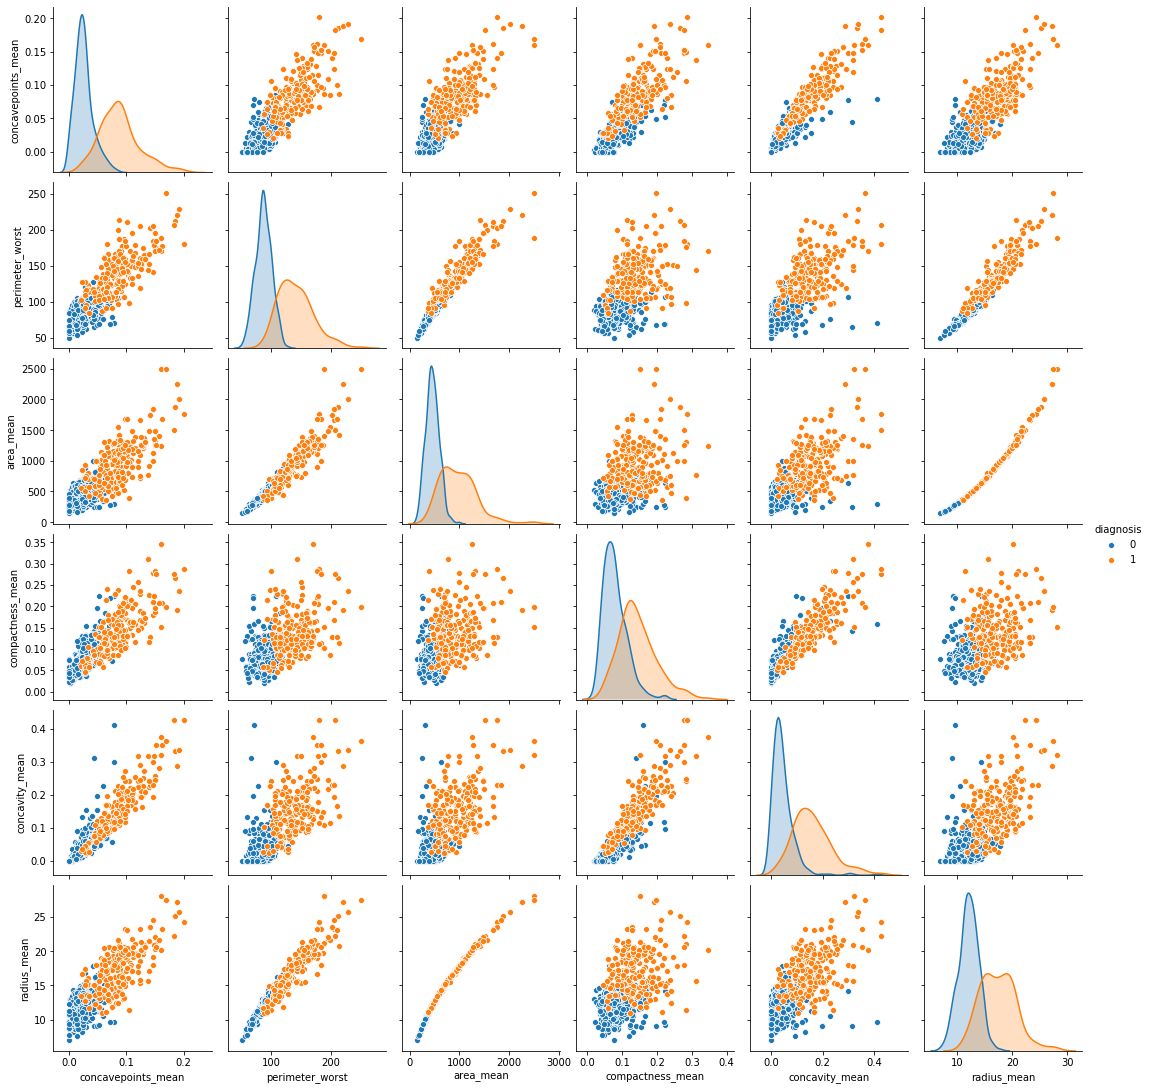

In [12]:
# Построим графики парных корреляций
sns.pairplot(df[['diagnosis', 'concavepoints_mean', 'perimeter_worst', 'area_mean', 'compactness_mean', 'concavity_mean', 
                 'radius_mean']], hue="diagnosis");

In [13]:
# Построим корреляцию для ярко-выраженных признаков
df[['perimeter_worst', 'area_mean', 'radius_mean']].corr()

,perimeter_worst,area_mean,radius_mean
perimeter_worst,1.000000,0.959120,0.965137
area_mean,0.959120,1.000000,0.987357
radius_mean,0.965137,0.987357,1.000000


In [14]:
# Построим дополнительную корреляцию для ярко-выраженных признаков
df[['compactness_mean', 'concavity_mean']].corr()

,compactness_mean,concavity_mean
compactness_mean,1.000000,0.883121
concavity_mean,0.883121,1.000000


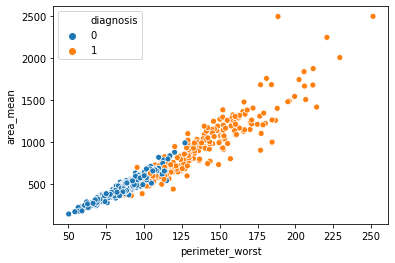

In [15]:
# 0 - доброкачественная, 1 - злокачественная
sns.scatterplot(x='perimeter_worst', y='area_mean', hue='diagnosis', data=df);

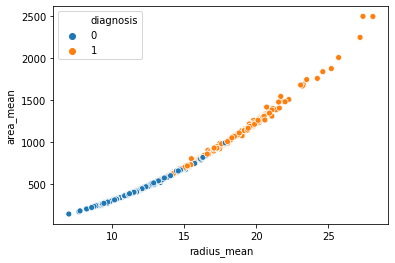

In [16]:
# 0 - доброкачественная, 1 - злокачественная
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df);

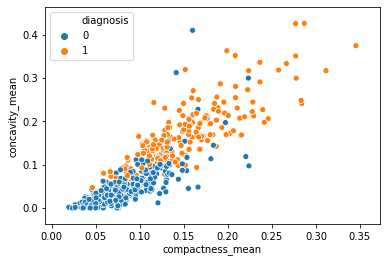

In [17]:
# 0 - доброкачественная, 1 - злокачественная
sns.scatterplot(x='compactness_mean', y='concavity_mean', hue='diagnosis', data=df);

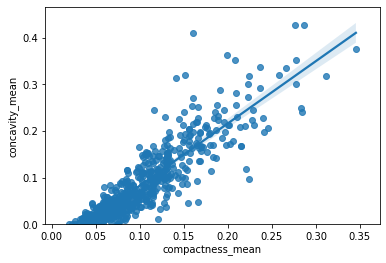

In [18]:
# Построим регрессионо-корреляционную прямую для предыдущей зависимости
sns.regplot(x='compactness_mean', y='concavity_mean', data=df)
plt.ylim(0,);

## Отделение злокачественных новообразований от доброкачественных [(Наверх)](#0) <a id="6"></a>

Построим "ящики с усами" для признаков, по которым было бы удобно определять тип опухоли

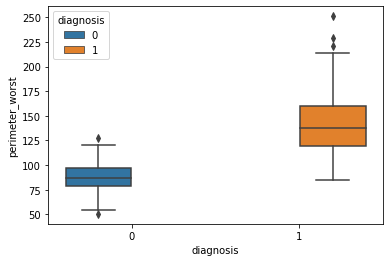

In [19]:
sns.boxplot(x='diagnosis', y='perimeter_worst', hue='diagnosis', 
            data=df[['diagnosis', 'perimeter_worst', 'area_mean', 'radius_mean']]);

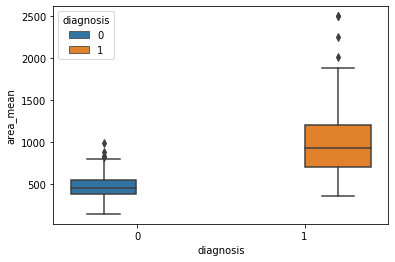

In [20]:
sns.boxplot(x='diagnosis', y='area_mean', hue='diagnosis', 
            data=df[['diagnosis', 'perimeter_worst', 'area_mean', 'radius_mean']]);

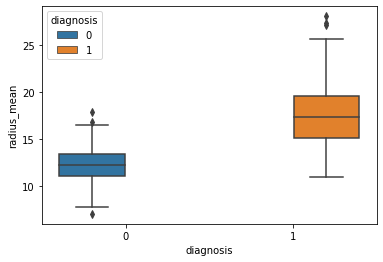

In [21]:
sns.boxplot(x='diagnosis', y='radius_mean', hue='diagnosis', 
            data=df[['diagnosis', 'perimeter_worst', 'area_mean', 'radius_mean']]);